

# Exploratory Data Analysis (EDA) for Kaggle's Time Series Forecasting Competition Data
### [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting)

Welcome to this notebook, where we will conduct an Exploratory Data Analysis (EDA) on the dataset provided by Kaggle's competition. The objective of this competition is to utilize time-series forecasting techniques to predict store sales based on data from Corporación Favorita, a prominent Ecuadorian-based grocery retailer.

**Goal of the Competition:**
The primary goal of this competition is to build a robust model that can accurately predict the unit sales of thousands of items sold across different Favorita stores. By analyzing the training dataset, which includes information such as dates, store details, item specifics, promotions, and unit sales, participants are encouraged to apply their machine learning skills to create precise forecasts.

**Context:**
Forecasting plays a crucial role not only in meteorology but also in various other domains. Governments rely on forecasts to predict economic growth, while scientists attempt to anticipate future population trends. For businesses, particularly brick-and-mortar grocery stores, accurate forecasting is essential to manage inventory effectively. An overestimation could lead to surplus perishable goods, while underestimation may result in popular items quickly running out, leading to revenue loss and dissatisfied customers. Machine learning, with its ability to provide more accurate predictions, offers a solution to this challenge faced by retailers.

Traditional forecasting methods in the retail sector often lack sufficient data to support their accuracy and are usually not automated. As retailers expand to new locations with distinct requirements, introduce new products, adapt to changing seasonal preferences, and implement unpredictable marketing strategies, the forecasting problem becomes even more complex.
For grocery stores, improved accuracy in forecasting can significantly reduce food waste related to overstocking and enhance overall customer satisfaction. As a result of this competition's findings, local stores may eventually be better equipped to provide precisely what customers need during their shopping experiences.

Let's proceed with the exploratory data analysis to gain valuable insights and prepare for the time series forecasting challenge ahead!


### Data Files
#### train.csv
The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
- **store_nbr** identifies the store at which the products are sold.
- **family** identifies the type of product sold.
- **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date.
Certainly, here's a revised and clarified version:
#### stores.csv
This dataset provides store metadata, including information about the city, state, store type, and cluster. The 'cluster' categorizes stores into groups based on their similarities.
#### oil.csv
This file contains daily oil prices, covering the entire timeframe of both the train and test data. It's important to note that Ecuador's economy is highly susceptible to fluctuations in oil prices, making this data significant for analysis.
#### holidays_events.csv
This dataset includes information about holidays and events, along with relevant metadata. 
- **transferred** column,indicates if a holiday was officially transferred to another date by the government. If a holiday is marked as transferred, it officially falls on a specific calendar day but was celebrated on a different date.

#### Notes:
 - Salaries within the public sector are distributed biweekly, occurring on the 15th day and the final day of each month. This timing has the potential to influence supermarket revenues.

 - Ecuador experienced a powerful earthquake measuring 7.8 on the Richter scale on April 16, 2016. In response, communities united in their relief endeavors, contributing items like water and essential supplies. This charitable response significantly impacted supermarket sales for multiple weeks following the seismic event.

In [39]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore') 
 
# Set the style
plt.style.use(
    "bmh"
)
# Set palette
sns.set_palette('crest')

# Set the size
plt.rcParams["figure.figsize"] = (
    15,
    6,
)
# Format floats to 2 decimal spaces
pd.options.display.float_format = '{:.2f}'.format

### Data ETL 

In [2]:
train_df = pd.read_csv('train.csv', 
                       index_col=0,
                       parse_dates=['date']
                       )
store_df = pd.read_csv('stores.csv')
oil_df = pd.read_csv('oil.csv', 
                     index_col=0, 
                     parse_dates=['date']
                     )
holidays_df = pd.read_csv('holidays_events.csv',
                          parse_dates=['date']
                          )

When merging holiday data with other DataFrames, national holidays should be merged only based on the 'date' column, whereas local holidays should be merged based on both the 'city' and 'date' columns. This distinction is crucial for correctly integrating holiday information into other datasets while maintaining accuracy and granularity.

We'll define a function that will condense the holiday information in 4 new columns. The first two columns, 'national_holiday_transfered' and 'national_holiday' are based on whether a holiday is of national significance ('locale' equals 'National') and whether it is transferred ('transferred' is True or False). The 'local_holiday_transfered' and 'local_holiday' columns represent the same conditions but for holidays that are not national.

In [3]:
def declare_holidays(row):
    is_national = (row['locale'] == 'National')
    is_transferred = row['transferred']
    return (
        is_national and is_transferred,
        is_national and not is_transferred,
        not is_national and is_transferred,
        not is_national and not is_transferred
    )

(
    holidays_df[['national_holiday_transfered', 'national_holiday', 'local_holiday_transfered', 'local_holiday']]
) = holidays_df.apply(declare_holidays, axis=1, result_type='expand')
holidays_df

,date,type,locale,locale_name,description,transferred,national_holiday_transfered,national_holiday,local_holiday_transfered,local_holiday
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,False,False,False,True
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,False,False,False,True
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,False,False,False,True
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,False,False,False,True
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False,False,True,False,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False,False,True,False,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False,False,True,False,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False,False,True,False,False


In [4]:
train_complete_data = train_df.merge(
    store_df, 
    on='store_nbr', 
    how="left"
    ).merge(
        oil_df, 
        on='date', 
        how="left"
        ).merge(
            holidays_df.query("locale == 'National'")[['date', 'national_holiday_transfered', 'national_holiday']], 
            on='date', 
            how="left", 
            ).merge(
            holidays_df.query("locale != 'National'")[['date','locale_name', 'local_holiday_transfered','local_holiday']], 
            left_on=['date', 'city'],
            right_on=['date', 'locale_name'],
            how="left", 
            ).drop(
                'locale_name', axis=1
                )
train_complete_data[['national_holiday_transfered', 'national_holiday', 'local_holiday_transfered','local_holiday']] = train_complete_data[['national_holiday_transfered', 'national_holiday', 'local_holiday_transfered','local_holiday']].fillna(False)

# Incorporate pay day information
train_complete_data['pay_day'] = (train_complete_data['date'].dt.strftime('%d') == '15') | train_complete_data['date'].dt.is_month_end

# Let's add a few time-related columns for the ease of temporal analysis
train_complete_data = train_complete_data.assign(
    year=train_df['date'].dt.year,
    date_no_year=train_df['date'].dt.strftime('%m-%d'),
    day_name=train_df['date'].dt.day_name(),
)
train_complete_data

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,national_holiday_transfered,national_holiday,local_holiday_transfered,local_holiday,pay_day,year,date_no_year,day_name
0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
1,2013-01-01,1,BABY CARE,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,2017-08-15,9,POULTRY,438.13,0,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN
3008276,2017-08-15,9,PREPARED FOODS,154.55,1,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN
3008277,2017-08-15,9,PRODUCE,2419.73,148,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN
3008278,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN


And there we have it—the comprehensive dataset that encompasses all available information regarding sales, stores, holidays, and gas prices on the respective dates.

### Sales by Product Family

In [5]:
display(
    train_complete_data[["store_nbr", "sales", "onpromotion"]].describe(
        percentiles=[0.25, 0.5, 0.75, 0.99]
    )
)
print("The data has {} points.".format(train_complete_data.shape[0]))
print(
    "There are {} different product families, sold in {} different stores.".format(
        train_complete_data["family"].nunique(), train_complete_data["store_nbr"].nunique()
    )
)

,store_nbr,sales,onpromotion
count,3008280.00,3008280.00,3008280.00
mean,27.50,358.26,2.61
std,15.59,1103.49,12.26
min,1.00,0.00,0.00
25%,14.00,0.00,0.00
50%,28.00,11.00,0.00
75%,41.00,196.00,0.00
99%,54.00,5513.99,55.00
max,54.00,124717.00,741.00


The data has 3008280 points.
There are 33 different product families, sold in 54 different stores.


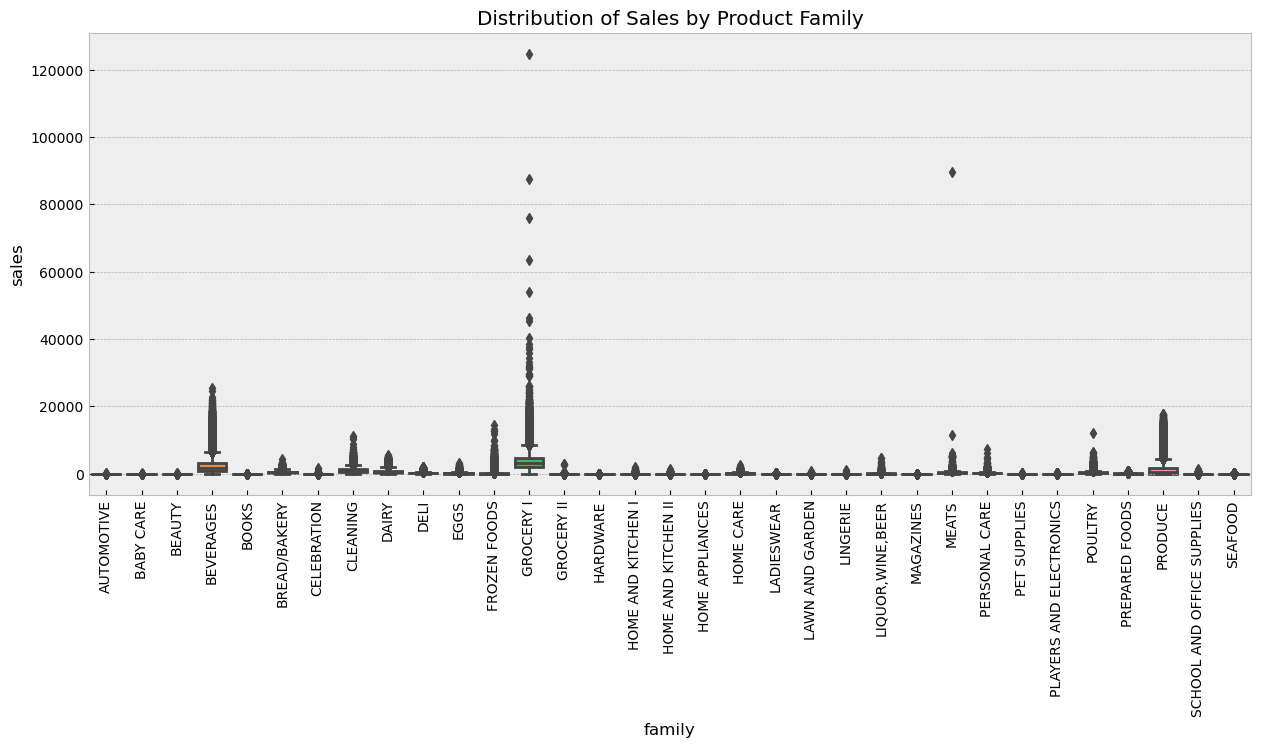

In [16]:
# Explore the distribution of sales by product family:
sns.boxplot(data=train_complete_data, x="family", y="sales")
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Product Family')
plt.show()

In [6]:
# Count outlier candidates using IQR Method (Interquartile Range):
q1, q3 = train_df["sales"].quantile(0.25), train_df["sales"].quantile(0.75)
outlier_percentage = (
    train_df[
        (train_df["sales"] < (q1 - 1.5 * (q3 - q1)))
        | (train_df["sales"] > (q3 + 1.5 * (q3 - q1)))
    ].shape[0]
    / train_df.shape[0]
) * 100
print(
    f"There are {outlier_percentage:.2f}% points that are considered outliers according to IQR method."
)

There are 14.90% points that are considered outliers according to IQR method.


The presence of 14.90% of data points identified as outliers using the IQR method suggests that a significant portion of the dataset deviates noticeably from the central distribution. While some of these deviations could result from data defects, it's worth considering that certain instances might significantly differ from the majority and potentially offer valuable insights or anomalies that require further investigation. These anomalies could have a substantial impact on how we interpret or model the overall dataset.

Furthermore, it's possible that the assumption of a uniform distribution for sales across all product families may not hold true. Some strata within the data may exhibit unique characteristics. 

Overall, the data displays noticeable irregularities in its sales figures, prompting the need to distinguish between potential anomalies and justified outliers.

In [8]:
# Let's explore those extriemly high sales: 
high_sales_df = train_complete_data.query("sales >= 60000").reset_index(drop=True)
high_sales_df['date']

0   2016-04-18
1   2016-04-21
2   2016-04-26
3   2016-05-02
4   2016-10-07
Name: date, dtype: datetime64[ns]

It's important to note that all dates with sales exceeding 60,000 occurred after the earthquake. As already indicated, this correlation is caused by relief efforts in items such as water and essential supplies. This charitable response had a substantial and lasting impact on supermarket sales for several weeks following the seismic event.

As earthquakes are unpredictable, this serves as an illustration of the impact that natural catastrophes can have on sales. However, it is important to note that such events do not significantly contribute to the modeling of regular sales patterns.

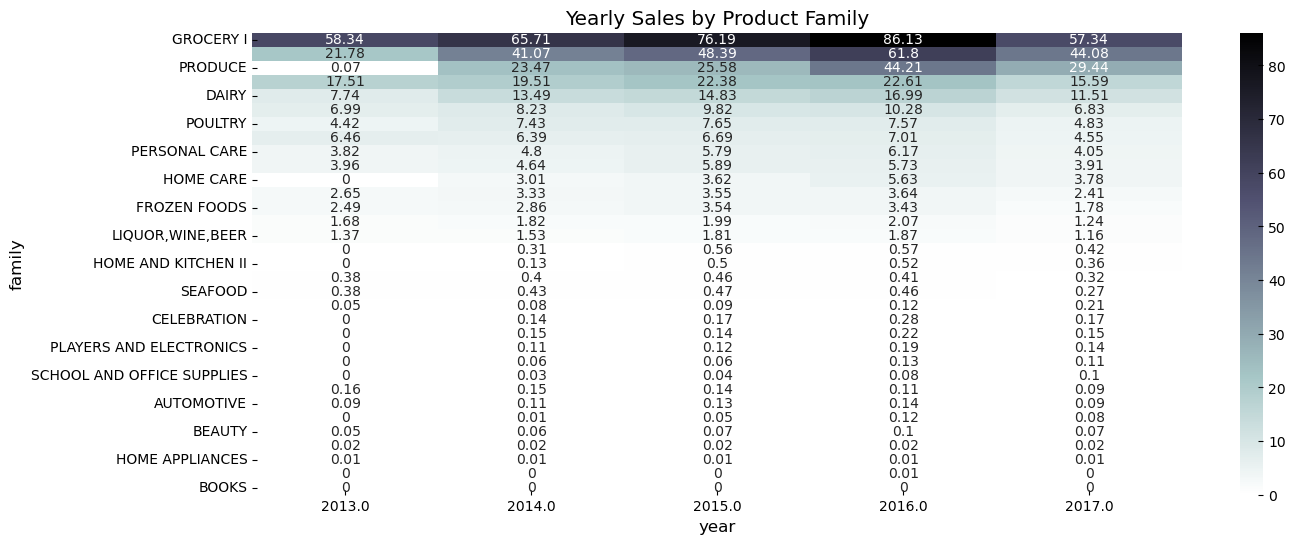

In [14]:
# What family sells the most?
yearly_sum_sales = train_complete_data.groupby(["family", "year"])["sales"].sum().reset_index()
sns.heatmap(
    data=yearly_sum_sales.pivot(index="family", columns="year", values="sales")
    .div(1000000)
    .round(2)
    .sort_values(by=2017, ascending=False),
    annot=True,
    cmap="bone_r",
    fmt="g",
)
plt.title('Yearly Sales by Product Family')
plt.show()

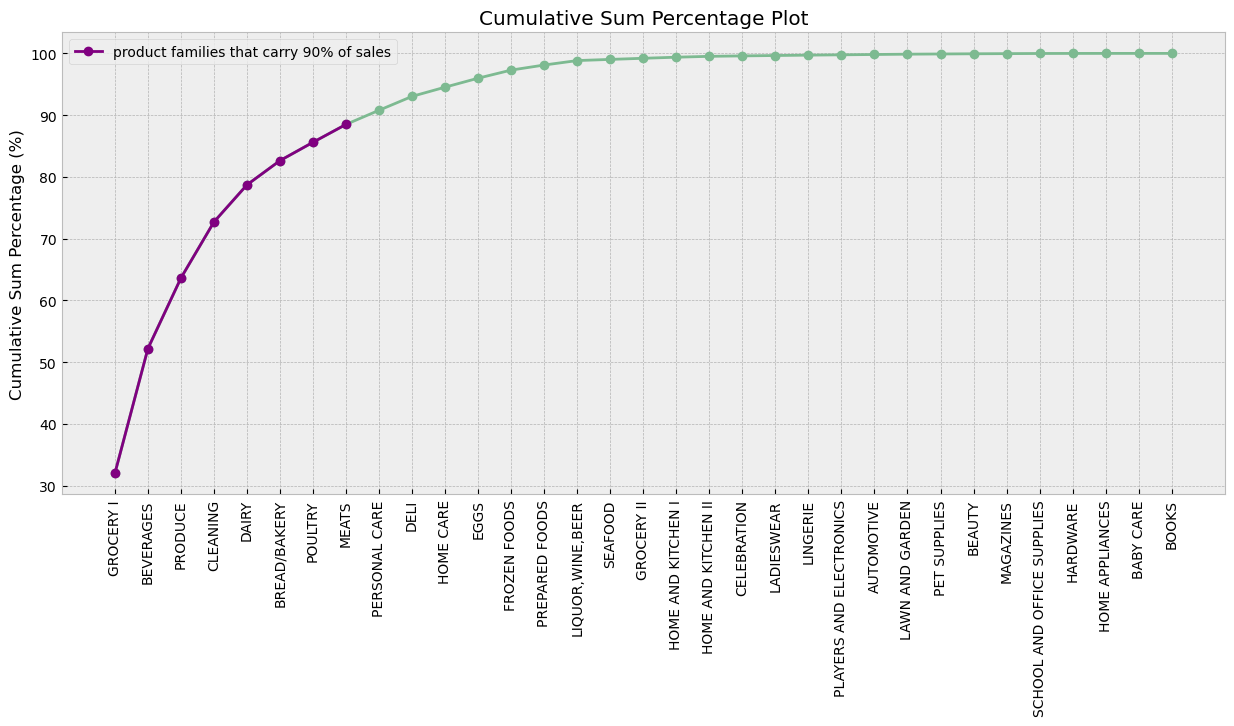

In [10]:
sum_sales = (
    yearly_sum_sales.groupby("family")["sales"].sum().sort_values(ascending=False)
)
cumulative_sum_percentage = (sum_sales.cumsum() / sum_sales.sum()) * 100

plt.plot(cumulative_sum_percentage, marker="o", linestyle="-")
plt.plot(
    cumulative_sum_percentage[cumulative_sum_percentage < 90],
    marker="o",
    linestyle="-",
    color="purple",
    label="product families that carry 90% of sales",
)

plt.title("Cumulative Sum Percentage Plot")
plt.ylabel("Cumulative Sum Percentage (%)")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Over the years, the majority of sales have consistently been concentrated within a select few product families, namely:
- GROCERY I  
- BEVERAGES
- PRODUCE
- CLEANING
- DAIRY
- BREAD/BAKERY
- POULTRY
- and MEATS

These product families collectively account for more than 90% of all sales.

### Sales by Store

In [42]:
fig = px.sunburst(train_complete_data, path=['state', 'city'], values='sales')
fig.show()

In [19]:
train_complete_data

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,national_holiday_transfered,national_holiday,local_holiday_transfered,local_holiday,pay_day,year,date_no_year,day_name
0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
1,2013-01-01,1,BABY CARE,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,D,13,NaN,False,True,False,False,False,2013.00,01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,2017-08-15,9,POULTRY,438.13,0,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN
3008276,2017-08-15,9,PREPARED FOODS,154.55,1,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN
3008277,2017-08-15,9,PRODUCE,2419.73,148,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN
3008278,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8,Quito,Pichincha,B,6,47.57,False,False,False,False,True,NaN,NaN,NaN


### Exploring the Relationship Between Sales and _On Promotion_

In [11]:
avg_sales_onpromotion = (
    train_complete_data.query("onpromotion != 0")
    .groupby(["family", "onpromotion"])["sales"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
# sns.scatterplot(
#     data=avg_sales_onpromotion, x="onpromotion", y="sales", alpha=0.5, hue="family", cmap="bone_r"
# )

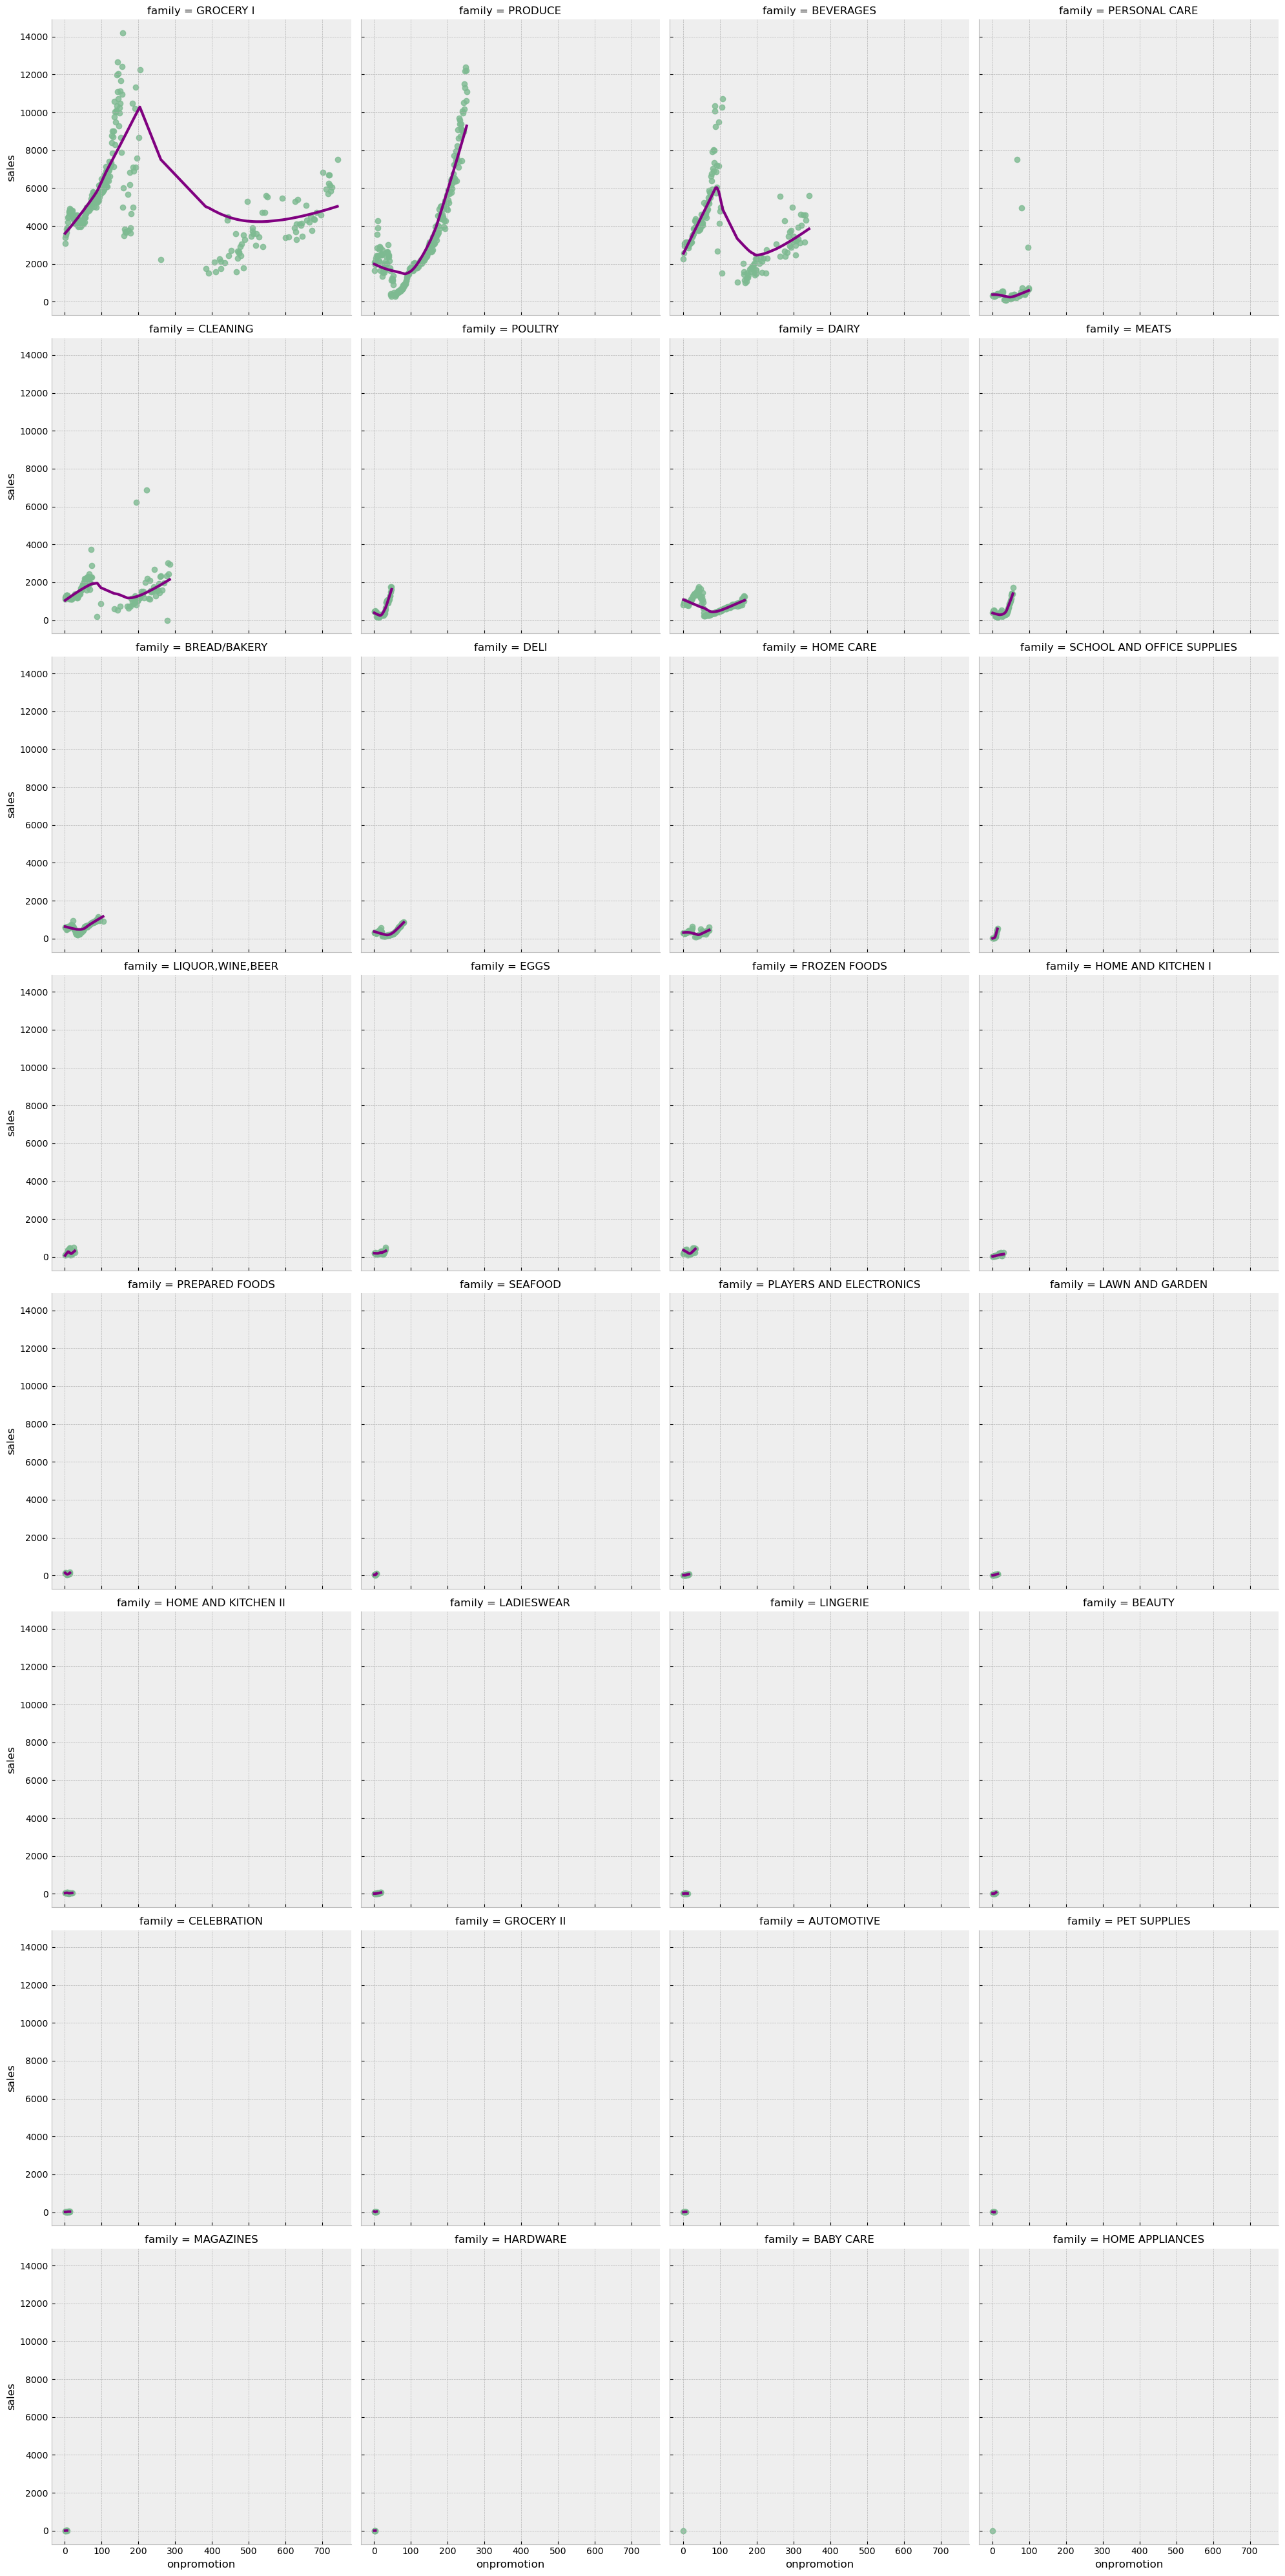

In [12]:
sns.lmplot(
    data=avg_sales_onpromotion,
    x="onpromotion",
    y="sales",
    col="family",
    col_wrap=4,
    lowess=True,
    line_kws={"color": "purple"},
    sharex=None,
    sharey=None,
)
plt.show()

In [13]:
ax = sns.boxplot(
    data=train_df.query("family == 'GROCERY I'"),
    x="day_name",
    y="sales",
    hue="year",
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    showfliers=False
)
plt.xlabel('')
plt.show()

ValueError: Could not interpret input 'day_name'

In [ ]:
# we should check autocorrelation coeficients
avg_daily_sales = train_df.groupby(['family', "year", "date_no_year"])["sales"].mean().reset_index()

for family in majority_of_sales:
    sns.lineplot(
        data=avg_daily_sales.query("family == @family"),
        x="date_no_year",
        y="sales",
        hue="year"
    )
    ticks, labels = plt.xticks()
    plt.xticks(ticks[::7], rotation=90)
    plt.title("Average daily sales of {y}.png".format(y=family))
    plt.xlabel('')
    plt.show()
    # plt.savefig("avg_ts_{y}.png".format(y=family))

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(avg_daily_sales.query("family == 'AUTOMOTIVE' & year == 2016")['sales'].tolist(), lags=50, ax=axes[0])
plot_pacf(avg_daily_sales.query("family == 'AUTOMOTIVE' & year == 2016")['sales'].tolist(), lags=50, ax=axes[1])
plt.show()

In [ ]:
pivoted = avg_daily_sales.pivot(columns='date_no_year', index=['family', 'year'], values='sales')
corr_ts = pivoted.loc[("GROCERY I", 2013):("GROCERY I", 2017)].corr()
sns.heatmap(corr_ts.iloc[0:21,0:21])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
additive_decomposition = seasonal_decompose(avg_daily_sales.query("family == 'GROCERY I'")['sales'].tolist(), model='multiplicative', period=50)

# Plot
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [ ]:
# avg_daily_sales
pivoted